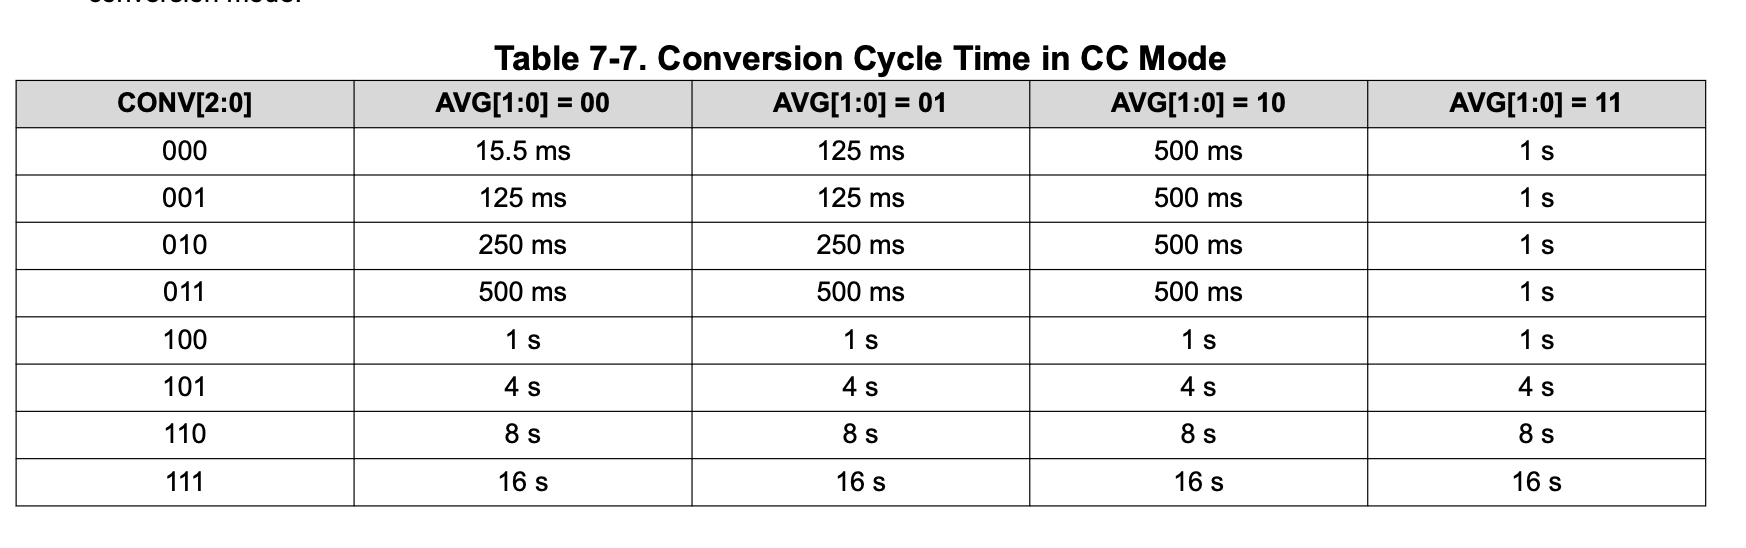

In [25]:
import numpy as np
import matplotlib
import pandas as pd
from IPython.display import Image
Image("convTimes.png")

Explanation of below functions:  
***Continuous conversion mode:*** The device continuously performs temperature conversions in this mode, as shown in Figure 7-3, and updates the temperature result register at the end of every active conversion  
***One-shot mode:*** After the device completes a (temperature conversion) one-shot conversion, the device goes to the *low-power shutdown mode*.  

In [26]:
def ContinuousConversion(CC_params): 
    standByCurrentConsumption = 1.25
    activeCurrentConsumption = 135
    convCycleTime = CC_params[0]
    num_averages = CC_params[1]

    activeConversionTime = num_averages*0.0155
    standbyTime =  convCycleTime- activeConversionTime
    amps = ((activeCurrentConsumption*activeConversionTime) + (standByCurrentConsumption*standbyTime)) / convCycleTime

    return amps * 3.3

#def OneShot():
	# compute and return power for one shot

In [27]:
def TMP117data(time, frequency, mode, CC_params, OS_params):
    if mode == "CC": 
        power = ContinuousConversion(CC_params)

    #elif mode == "OS": 
        #power = OneShot(OS_params)

    #else: # low limit stuff

    return power, time # returns data and time as functions of time


Parameters for TMP117 (to be changed by teams)  
...add more explanation of what each input does later  
add explanation of what possible inputs including default are for each input ...  

**Continuous conversion (if selected) params**:  
**possible conversion cycle times (see column 1 of table below)**: 0.0155, 0.125, 0.25, 0.5, 1, 4, 8, 16  
**possible averaging inputs**: 0, 8, 32, 64


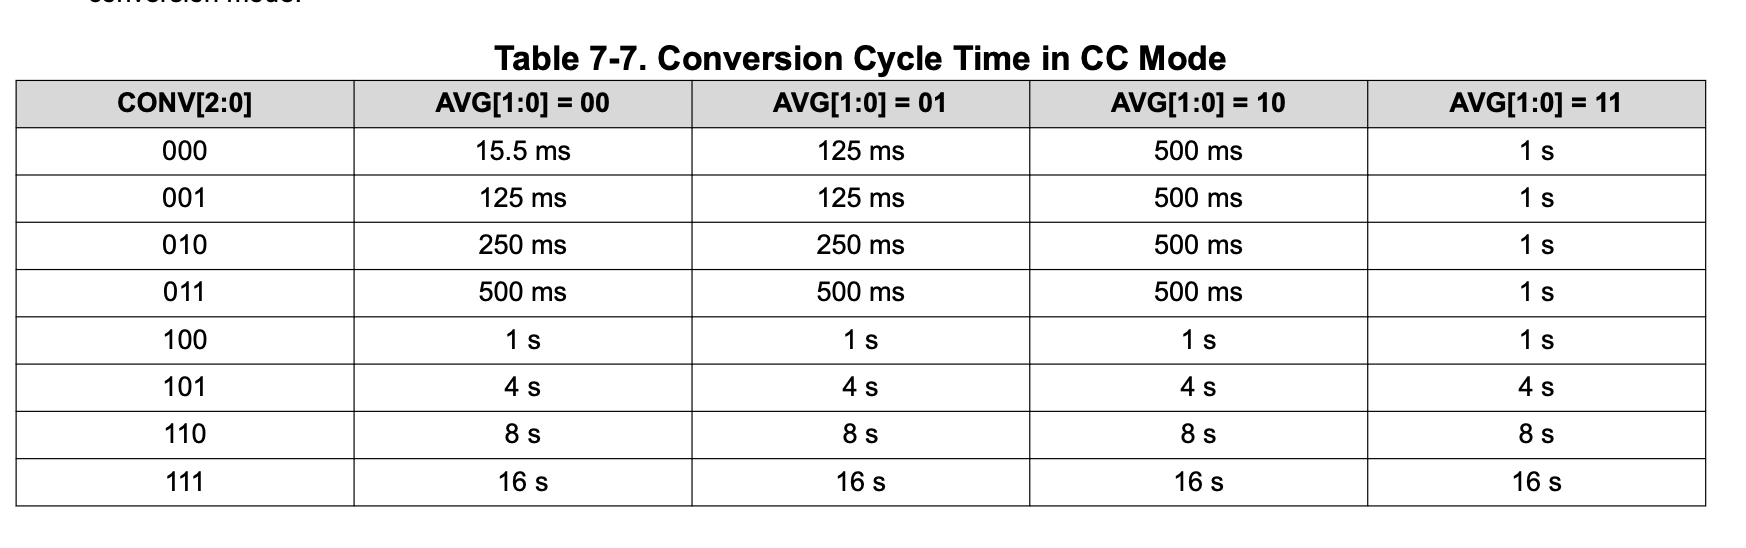

In [28]:
Image("convTimes.png")

In [29]:
mode = 'CC'
time = 0 # possible inputs: ...
frequency = 0 # possible inputs: ...

convCycle = 0.0155 # possible inputs: .0155, 0.125, 0.25, 0.5, 1, 4, 8, 16  
num_averages = 0 # possible inputs**: 0, 8, 32, 64
CC_params = [convCycle, num_averages] # set to 0 if mode chosen is not CC

OS_params = [] # set to 0 if mode chosen is not OS

power_output = TMP117data(time, frequency, mode, CC_params, OS_params) # calling the TMP117 function to output the power 

In [30]:
print(power_output)

(4.125, 0)
